**Assignment 15**- Random Forest 

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

**Importing the libraries**

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

Reading the input csv file

In [217]:
fr=pd.read_csv("/content/Fraud_check.csv")
fr.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [218]:
fr.describe()                  ## checking the statistics of the data

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [219]:
fr.info()                 ## check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [220]:
fr[fr.duplicated(keep = False)]             ##check for duplicate values

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


Checking the distribution of data using Distlot

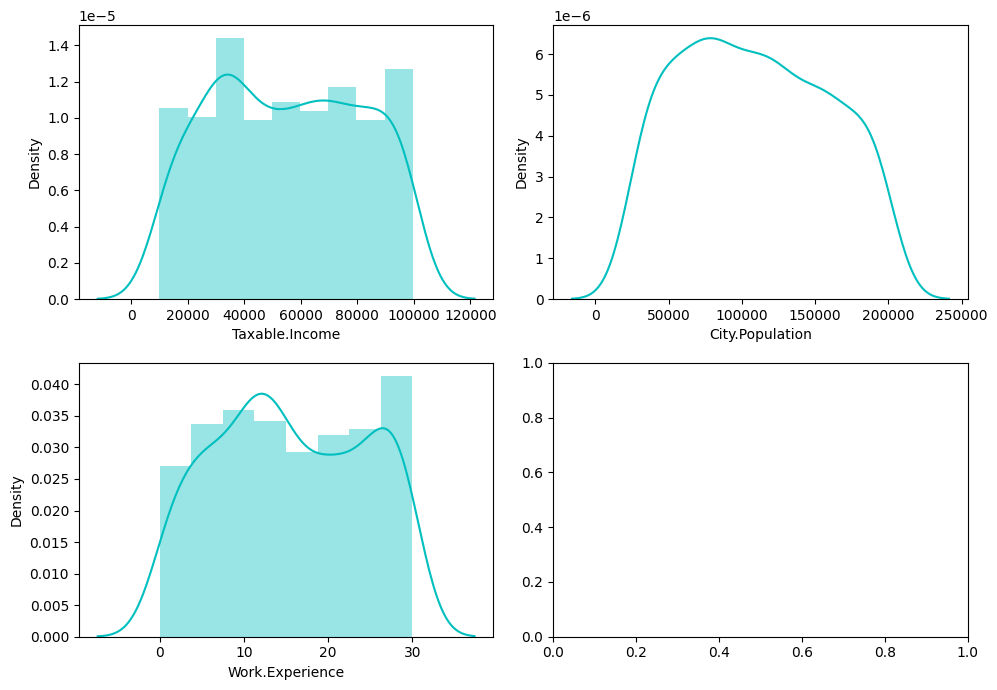

In [221]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
sns.distplot(fr["Taxable.Income"], ax=ax[0,0],color='c')
sns.kdeplot(fr["City.Population"], ax=ax[0,1],color='c')
sns.distplot(fr["Work.Experience"], ax=ax[1,0],color='c')
plt.tight_layout()
plt.show()

Converting all the categorical variable to numerical values using Label encoding

In [222]:
label_encoder = preprocessing.LabelEncoder()
fr['Undergrad']= label_encoder.fit_transform(fr['Undergrad']) 
fr['Marital.Status']= label_encoder.fit_transform(fr['Marital.Status']) 
fr['Urban']= label_encoder.fit_transform(fr['Urban']) 

Finding the income above 30,000 and classifying the categories that are greater than 30,000, as people with higher income, subjected to taxation

In [223]:
fr["Taxable.Income"]=(fr["Taxable.Income"]>30000)*1        

In [224]:
fr

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


Target column is taxable income, so will drop it

In [225]:
x=fr.drop(axis=1,columns="Taxable.Income")
y=fr["Taxable.Income"]

In [226]:
fr["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

Splitting data into training and testing data set

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Building a Random Forest classifier**

In [228]:
model=RandomForestClassifier(n_estimators=110, max_features=3)

In [229]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110)

In [230]:
Y_pred=model.predict(x_train)

In [231]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


Checking the score for the model (training data)

In [232]:
model.score(x_train, y_train)

1.0

Predicting on the test data using the built Random forest classifier model 

In [233]:
y_pred=model.predict(x_test)

In [234]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7555555555555555


Finding the score of the model (test data)

In [235]:
model.score(x_test, y_test)

0.7555555555555555

Seeing important features 

In [236]:
feature_imp=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

City.Population    0.528111
Work.Experience    0.279561
Marital.Status     0.088317
Urban              0.054206
Undergrad          0.049806
dtype: float64

Visualising important features using Barplot

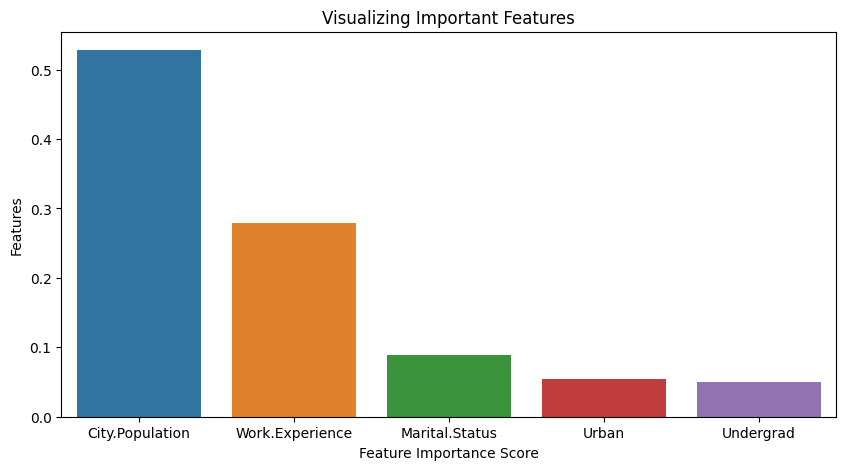

In [237]:
plt.figure(figsize=(10,5))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

using for loop with the range 1-5 for different features

In [238]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=3)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

Listing down the accuracies in a dataframe, for different max depth 

In [239]:
accuracies = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
accuracies

,max_features,train_acc,test_acc
0,1,1.0,0.733333
1,2,1.0,0.744444
2,3,1.0,0.744444
3,4,1.0,0.738889
4,5,1.0,0.755556
5,6,1.0,0.772222
6,7,1.0,0.750000
7,8,1.0,0.766667
8,9,1.0,0.744444


Visualizing the accuracy graph, based on the max_depth

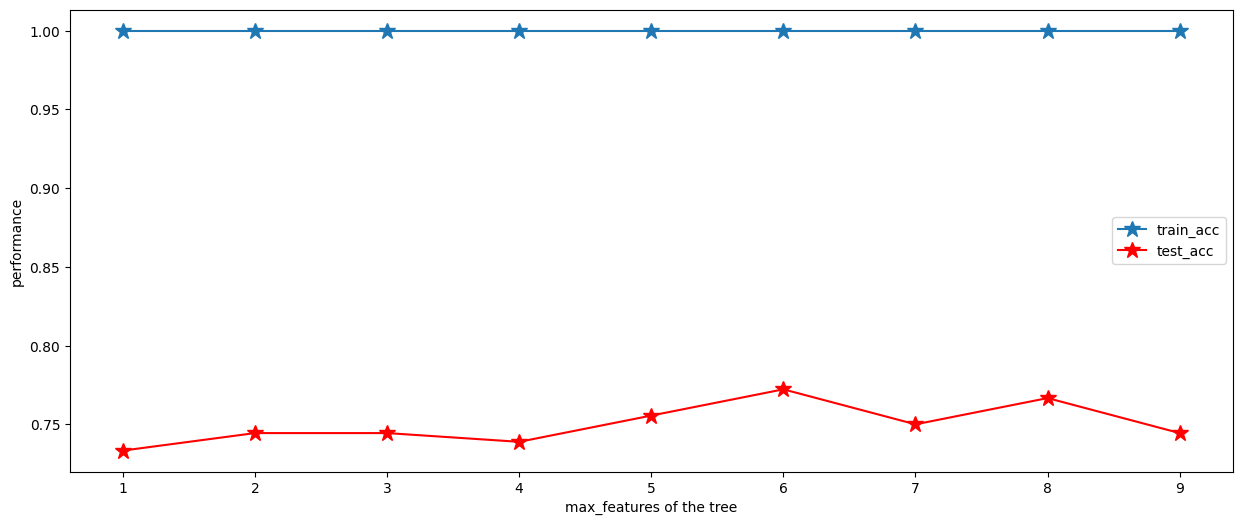

In [240]:
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(accuracies['max_features'],accuracies['train_acc'], marker = '*',markersize=12)
plt.plot(accuracies['max_features'], accuracies['test_acc'], marker = '*',markersize=12, color='red')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

Using Confusion matrix

In [241]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[  2,  38],
       [  6, 134]])

Using Heatmap to visualize

Text(0.5, 1.0, 'Accuracy Score: 0.7777777777777778')

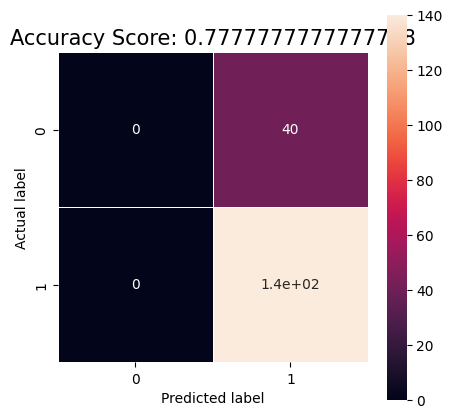

In [254]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

Making a report

In [243]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.12      0.03      0.04        40
           1       0.77      0.95      0.85       140

    accuracy                           0.74       180
   macro avg       0.45      0.49      0.45       180
weighted avg       0.63      0.74      0.67       180



Trying a cross validation KFold split, to check if the accuracy of the model increases or not

In [244]:
kfold=KFold(n_splits=8,random_state=None)

In [245]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.7416666666666667


Using Adaboost classifier

In [246]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

In [247]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7916666666666666


Evaluating Adaboost classifier and checking accuracy

In [248]:
model.fit(x_train,y_train)
print("accuracy:",model.score(x_train, y_train))

accuracy: 0.8


Predicting the test data using model 

In [252]:
y_pred=model.predict(x_test)

In [253]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7777777777777778


Comparing the results of adaboost with and without implementing

In [251]:
accuracies

,max_features,train_acc,test_acc
0,1,1.0,0.733333
1,2,1.0,0.744444
2,3,1.0,0.744444
3,4,1.0,0.738889
4,5,1.0,0.755556
5,6,1.0,0.772222
6,7,1.0,0.750000
7,8,1.0,0.766667
8,9,1.0,0.744444


**Conclusion:**- From the consolidated data,the highest accuracy from the Random forest classifier is 77.2%. 
Using Adaptive boosting classifier algorithm the accuracy of the model increased to 77.7%. Thus, both are well suited for the problem statement. 